# Importing files needed from the quantum network routing library

In [1]:
%run ./lib/helper.py
%run ./lib/graph.py
%run ./lib/graph_edge_factory.py
%run ./lib/plot.py
%run ./lib/routing_simulation.py
%run ./lib/routing_algorithms.py
%run ./lib/logger.py
%run ./lib/parse_from_log.py
%run ./lib/shortest_path.py

# Running simulations for the local knowledge approach

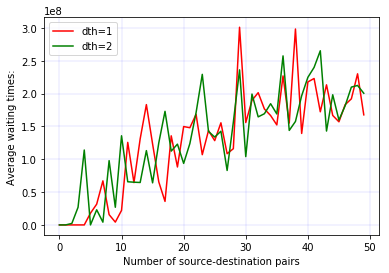

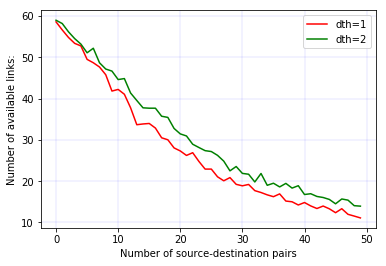

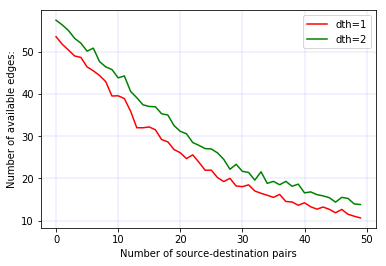

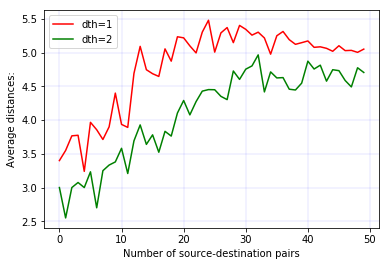

In [4]:
# Example code for running an local knowledge simulation in a graph of 32 nodes.
# We specify a varying value for the distance threshold (dth), whereas the maximum distance threshold (max dth)
# is constant (additional edges are added for the case when the dth is not equal to max dth
local_knowledge_results = []
samples = 10
max_dth = 16
propagation_radius = 2
start = time.time()
for dth in range(2, 4):
    threshold = 2 ** dth
    factory = graph_edge_factory.VirtualEdgeFactory(distance_threshold=threshold, max_distance_threshold=max_dth)
    graph_edges = factory.generate_deterministic_graph_edges()
    arguments = {'algorithm': routing_algorithms.local_knowledge_algorithm, 'graph_edges': graph_edges,
                 'link_prediction': False, 'exponential_scale': True, 'propagation_radius': propagation_radius}
    topology_result, length = routing_simulation.run_algorithm_for_graphs(50, samples, arguments)
    local_knowledge_results.append(topology_result)
end = time.time()
plot_results(local_knowledge_results, 'local_knowledge_maxdth_' + str(max_dth) + '_prop_radius_'
                  + str(propagation_radius) + '_' + str(end-start),
                  save_tikz = False)